<center>
  <div class="alert alert-block alert-info" style="padding: 20px; margin: 0 auto; text-align: center; border: 2px solid #289C4E; width: fit-content; background-image: url('your-image-url.jpg'); background-color: #f0f0f0; background-size: cover; background-position: center;">
    <h1 style="color: #289C4E;">
      Assignment 2: Data-Driven Optimization with Machine Learning Applications
    </h1>
    <h2> Darix SAMANI SIEWE</h2>
  </div>
</center>


##  Introduction

The main goal of this assignment is to see how optimization techniques can improve the model. This assignment is split into two parts: the first part is about building the models using the optimized version of linear regression, such as Ridge Regression and Elastic Net Regression, and the second part focuses on building a model with a simple CNN and seeing how augmentation techniques like rotation (e.g., tilting), flipping (e.g., horizontal orvertical flipping), translation (e.g., shifting the image in its frame), zooming, scaling, and cropping (changing image size by re-scaling), etc..  can improve the performance of our accuracy.

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Question 1

To dive deep into the training model, we need to follow certain steps that help us understand our dataset and prepare it for building the model.

Use the Scikit-Learn machine learning library to implement
- Linear Regression,
- Ridge Regression,
- Elastic Net.

and compare and contrast the performance of all the three models.
Use the dataset LifeExpectancyData.csv available in the course’s Google Drive.

In [38]:
## import the requirement librairies

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

## load the dataset
df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/LifeExpectancyData.csv')
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [39]:
## summary of our dataset
df.describe(include="all")

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,...,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,...,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,...,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,...,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,...,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000


## Summary of our dataset

Based on the summary above, we can see that our dataset contains 2 categorical columns and 20 numerical columns.

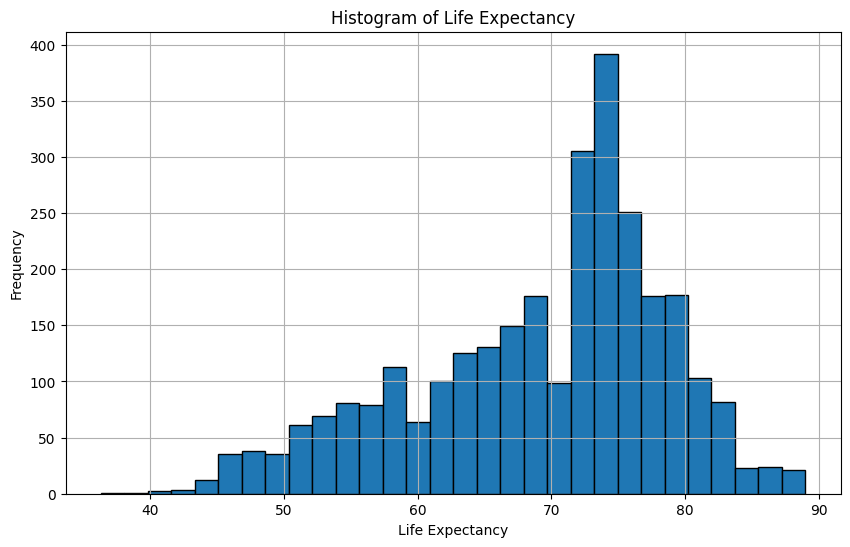

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["Life expectancy "], bins=30, edgecolor='black')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.grid(True)
plt.show()


### Interpretation of our Histogram

Based on the histogram of the target variable we use that the target varible seems to follows the normal distribution so we can use linear regression because it's the first assumption of our linear regression model.

## **Preprocessing of our dataset**

In this step, we are preprocessing our dataset by filling the missing numerical columns with the mean and the categorical columns with the mode. This process is crucial for building our model.

In [41]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns


df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


## Encoding and Standardize our dataset

In this step we just standardize our numerical dataset and use the oneHotEncoder for categorical variable.

In [42]:

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

numerical_cols = numerical_cols.drop('Life expectancy ')


X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

## Correlation between Numerical Input Varibale and Target Variable.

Based on the correlation above betwwen the numerical input variable and the target variable we can see that the must variable that it's must correlate to our input varibale is the varibale Adult Mortality and Alcohol, Percentage expenditure, BMI, Polio, Diphtheria, HIV/AIDS, GDP, income composition of ressources, schooling.

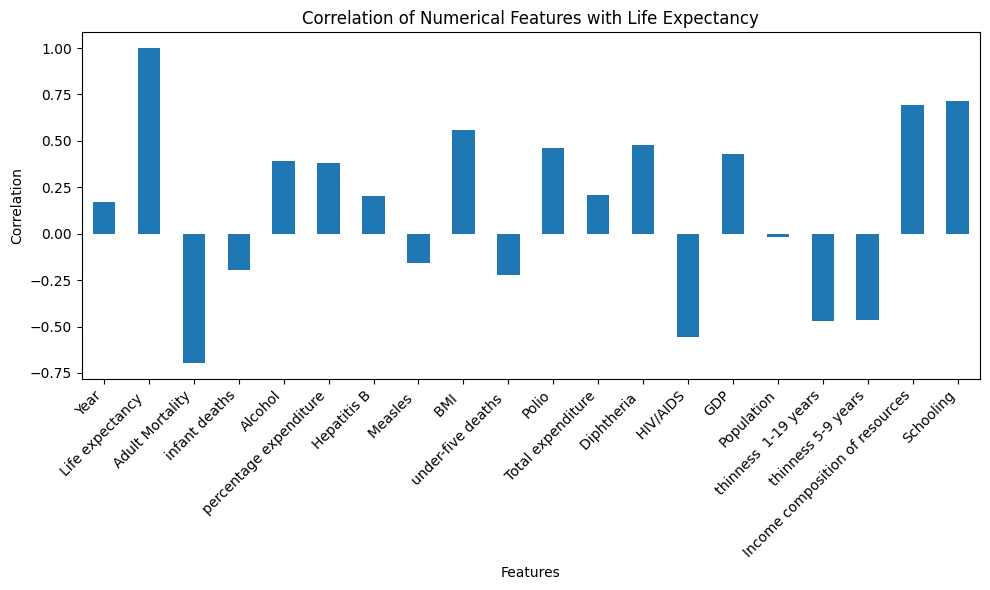

In [43]:
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numerical_cols].corrwith(df['Life expectancy '])
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation of Numerical Features with Life Expectancy')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [44]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/LifeExpectancyData.csv')

numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

numerical_cols = numerical_cols.drop('Life expectancy ')
X = df.drop(columns=['Life expectancy '])
y = df['Life expectancy ']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'Elastic Net': (ElasticNet(), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]})
}

results = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'best_params': grid_search.best_params_, 'mse': mse, 'r2': r2}

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Hyperparameters: {result['best_params']}")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"R-squared: {result['r2']}")
    print("-" * 20)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: Linear Regression
Best Hyperparameters: {}
Mean Squared Error: 3.059072458538233
R-squared: 0.9646902212616292
--------------------
Model: Ridge Regression
Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error: 3.0820070776086057
R-squared: 0.9644254951605643
--------------------
Model: Elastic Net
Best Hyperparameters: {'alpha': 0.1, 'l1_ratio': 0.2}
Mean Squared Error: 15.996051510651926
R-squared: 0.8153633013980329
--------------------


### 1. Linear Regression:
- **Best Hyperparameters**: There are no hyperparameters mentioned for linear regression, which means it’s using the default settings.
- **Mean Squared Error (MSE)**: 3.06 – The model's error on the predictions is relatively low, but it's important to compare it with other models.
- **R-squared**: 0.96 – This is quite a strong value, indicating that linear regression explains 96.47% of the variance in the data, which suggests it's performing well.

### 2. Ridge Regression:
- **Best Hyperparameters**: `alpha = 0.1` – Ridge regression is using a small regularization value (alpha = 0.1), which means it's applying a small penalty to the coefficients.
- **Mean Squared Error (MSE)**: 3.08 – The MSE is slightly worse than the linear regression model, but the difference is quite small.
- **R-squared**: 0.96 – This is still very high and quite close to the linear regression, so Ridge seems to be performing almost as well as Linear Regression with a slight reduction in R².

### 3. Elastic Net:
- **Best Hyperparameters**: `alpha = 0.1` and `l1_ratio = 0.2` – Elastic Net combines penalties from both Ridge and Lasso, and these parameters suggest it’s using a mild combination of both.
- **Mean Squared Error (MSE)**: 16.00 – This is much higher than both Linear and Ridge regression, indicating worse predictive performance.
- **R-squared**: 0.82 – The R-squared is significantly lower than the previous two models, showing that Ela


### Summary:
- **Linear Regression** and **Ridge Regression** are performing very similarly in terms of MSE and R-squared, with Linear slightly ahead.
- **Elastic Net** seems to perform poorly compared to the other two models, with a much higher MSE and significantly lower R-squared, suggesting that the combination of penalties might not be suitable for this particular dataset or that the hyperparameters chosen aren’t ideal.
- The results suggest that **Linear Regression** or **Ridge Regression** would likely be better choices, and further tuning of Elastic Net might be needed to improve performance.

2. Deep Learning with CNN for Clothing Classification using Fashion-MNIST dataset.

  2a) Use PyTorch to design a CNN model for clothing classification with suitable input dimension, convolutional layers, fully connected layers, and an output layer.

  2b) Use the dataset mnist_fashion_train.csv for training the CNN from 2a) and the test its
performance using mnist_fashion_test.csv.

In [45]:
df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/LifeExpectancyData.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


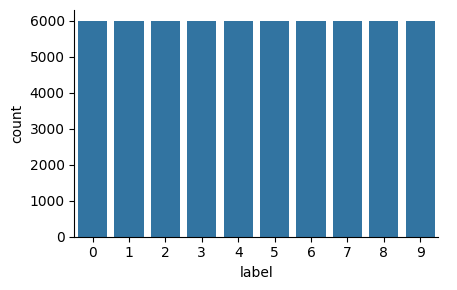

In [46]:
import seaborn as sns
train_df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/mnist_fashion_train.csv')
sns.catplot(x='label', data=train_df, kind='count', height=3, aspect=1.5)

Based on the correlation above, we can see that our dataset is highly imbalanced because the distribution of the target variable gives approximately the same value.

In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


class FashionCNN(nn.Module):
    def __init__(self):
        super(FashionCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(self._get_conv_output_size(), 600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(600, 120)
        self.fc3 = nn.Linear(120, 10)

    def _get_conv_output_size(self):
        dummy_input = torch.zeros(1, 1, 28, 28)
        dummy_output = self.layer2(self.layer1(dummy_input))
        return dummy_output.view(1, -1).size(1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

train_df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/mnist_fashion_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/mnist_fashion_test.csv')

train_data = torch.tensor(train_df.drop(columns='label').values.astype(np.float32)/255.).view(-1, 1, 28, 28)
train_labels = torch.tensor(train_df['label'].values)

test_data = torch.tensor(test_df.drop(columns='label').values.astype(np.float32)/255.).view(-1, 1, 28, 28)
test_labels = torch.tensor(test_df['label'].values)

train_dataset = torch.utils.data.TensorDataset(train_data, train_labels)
test_dataset = torch.utils.data.TensorDataset(test_data, test_labels)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False)

model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

test_losses = []
test_accuracies = []


num_epochs = 20
for epoch in range(num_epochs):

    model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


    model.eval()
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()  # Accumulate test loss

            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            true_labels.extend(labels.numpy())
            predicted_labels.extend(predicted.numpy())


    average_test_loss = test_loss / len(test_loader)

    test_accuracy = 100 * correct_predictions / total_predictions

    test_losses.append(average_test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch [1/20], Step [100/600], Loss: 0.4777
Epoch [1/20], Step [200/600], Loss: 0.3040
Epoch [1/20], Step [300/600], Loss: 0.3922
Epoch [1/20], Step [400/600], Loss: 0.2773
Epoch [1/20], Step [500/600], Loss: 0.3816
Epoch [1/20], Step [600/600], Loss: 0.3193
Epoch [1/20] Test Loss: 0.3485, Test Accuracy: 87.37%
Epoch [2/20], Step [100/600], Loss: 0.3660
Epoch [2/20], Step [200/600], Loss: 0.3450
Epoch [2/20], Step [300/600], Loss: 0.2450
Epoch [2/20], Step [400/600], Loss: 0.1544
Epoch [2/20], Step [500/600], Loss: 0.2208
Epoch [2/20], Step [600/600], Loss: 0.3427
Epoch [2/20] Test Loss: 0.2990, Test Accuracy: 89.20%
Epoch [3/20], Step [100/600], Loss: 0.1512
Epoch [3/20], Step [200/600], Loss: 0.3787
Epoch [3/20], Step [300/600], Loss: 0.2982
Epoch [3/20], Step [400/600], Loss: 0.1149
Epoch [3/20], Step [500/600], Loss: 0.4132
Epoch [3/20], Step [600/600], Loss: 0.2765
Epoch [3/20] Test Loss: 0.2846, Test Accuracy: 89.52%
Epoch [4/20], Step [100/600], Loss: 0.2688
Epoch [4/20], Step [2

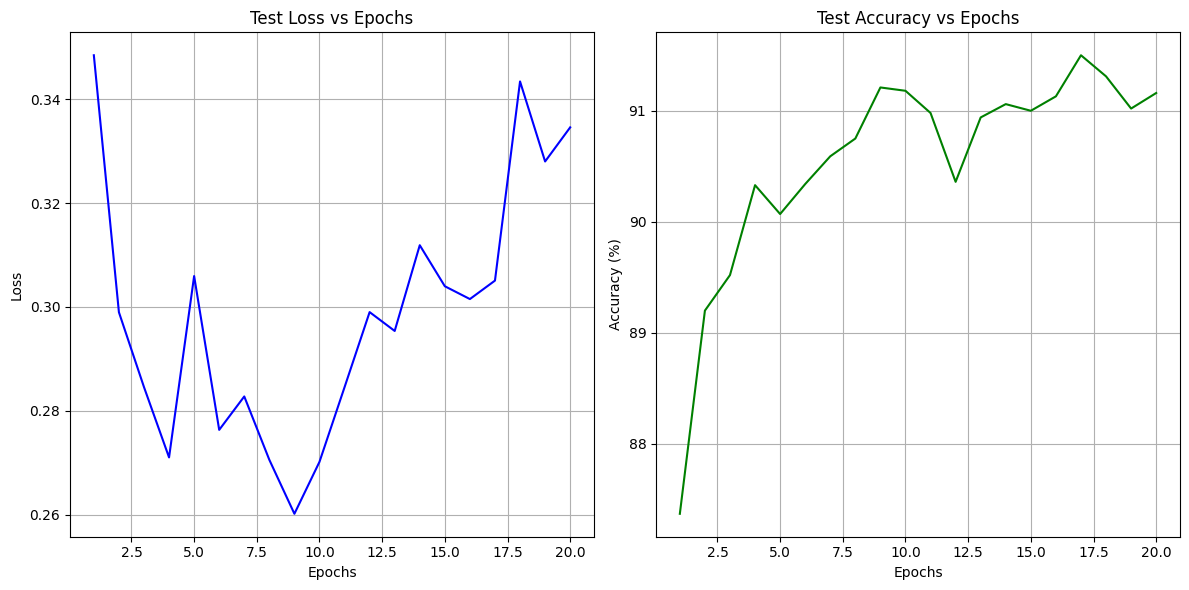

In [48]:

epochs = range(1, num_epochs + 1)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, test_losses, label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss vs Epochs')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()

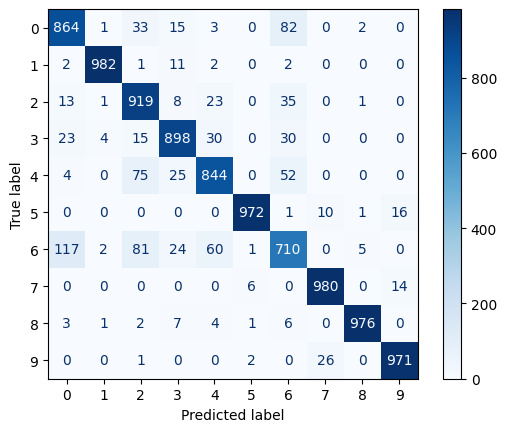

In [49]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(10)])
cmd.plot(cmap='Blues')

This Confusion matrix show us that our model performe well due the fact that the occuracy of our model is 91%.

In [50]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/mnist_fashion_train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/ASSIGNMENTS/mnist_fashion_test.csv')


train_data = torch.tensor(train_df.drop(columns='label').values.astype(np.float32) / 255.).view(-1, 1, 28, 28)
train_labels = torch.tensor(train_df['label'].values)

test_data = torch.tensor(test_df.drop(columns='label').values.astype(np.float32) / 255.).view(-1, 1, 28, 28)
test_labels = torch.tensor(test_df['label'].values)

class AugmentedFashionDataset(Dataset):
    def __init__(self, data, labels, transform=None):
        self.data = data
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx].squeeze(0)
        label = self.labels[idx]

        image = Image.fromarray(image.numpy(), mode='L')
        if self.transform:
            image = self.transform(image)

        return image, label


train_transform_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_transform_2 = transforms.Compose([
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])

train_transform_3 = transforms.Compose([
    transforms.RandomRotation(degrees=45),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
])


train_dataset_1 = AugmentedFashionDataset(train_data, train_labels, transform=train_transform_1)
train_dataset_2 = AugmentedFashionDataset(train_data, train_labels, transform=train_transform_2)
train_dataset_3 = AugmentedFashionDataset(train_data, train_labels, transform=train_transform_3)



test_dataset_1 = AugmentedFashionDataset(test_data, test_labels, transform=train_transform_1)
test_dataset_2 = AugmentedFashionDataset(test_data, test_labels, transform=train_transform_2)
test_dataset_3 = AugmentedFashionDataset(test_data, test_labels, transform=train_transform_3)

augmented_train_dataset = torch.utils.data.ConcatDataset([train_dataset_1, train_dataset_2, train_dataset_3])


train_loader = DataLoader(augmented_train_dataset, batch_size=100, shuffle=True)

augmented_test_dataset = torch.utils.data.ConcatDataset([test_dataset_1, test_dataset_2, test_dataset_3])


test_loader = DataLoader(augmented_test_dataset, batch_size=100, shuffle=True)


print(f"Total number of samples in augmented dataset: {len(augmented_train_dataset)}")
print(f"Total number of samples in augmented dataset: {len(augmented_test_dataset)}")


for images, labels in train_loader:
    print(images.shape)
    print(labels.shape)
    break




model = FashionCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

test_losses = []
test_accuracies = []

num_epochs = 20
for epoch in range(num_epochs):

    model.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    model.eval()
    test_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    true_labels = []
    predicted_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_predictions += labels.size(0)

            true_labels.extend(labels.numpy())
            predicted_labels.extend(predicted.numpy())


    average_test_loss = test_loss / len(test_loader)

    test_accuracy = 100 * correct_predictions / total_predictions

    test_losses.append(average_test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}] Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')


Total number of samples in augmented dataset: 180000
Total number of samples in augmented dataset: 30000
torch.Size([100, 1, 28, 28])
torch.Size([100])


/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch [1/20], Step [100/1800], Loss: 1.1699
Epoch [1/20], Step [200/1800], Loss: 1.1811
Epoch [1/20], Step [300/1800], Loss: 1.3761
Epoch [1/20], Step [400/1800], Loss: 1.1263
Epoch [1/20], Step [500/1800], Loss: 0.9986
Epoch [1/20], Step [600/1800], Loss: 0.9231
Epoch [1/20], Step [700/1800], Loss: 1.1218
Epoch [1/20], Step [800/1800], Loss: 0.8915
Epoch [1/20], Step [900/1800], Loss: 0.9752
Epoch [1/20], Step [1000/1800], Loss: 1.1952
Epoch [1/20], Step [1100/1800], Loss: 1.0964
Epoch [1/20], Step [1200/1800], Loss: 1.1335
Epoch [1/20], Step [1300/1800], Loss: 0.9622
Epoch [1/20], Step [1400/1800], Loss: 1.2786
Epoch [1/20], Step [1500/1800], Loss: 1.0009
Epoch [1/20], Step [1600/1800], Loss: 0.9501
Epoch [1/20], Step [1700/1800], Loss: 1.1119
Epoch [1/20], Step [1800/1800], Loss: 1.1453
Epoch [1/20] Test Loss: 1.0465, Test Accuracy: 58.78%
Epoch [2/20], Step [100/1800], Loss: 0.9646
Epoch [2/20], Step [200/1800], Loss: 0.9477
Epoch [2/20], Step [300/1800], Loss: 0.9012
Epoch [2/20],

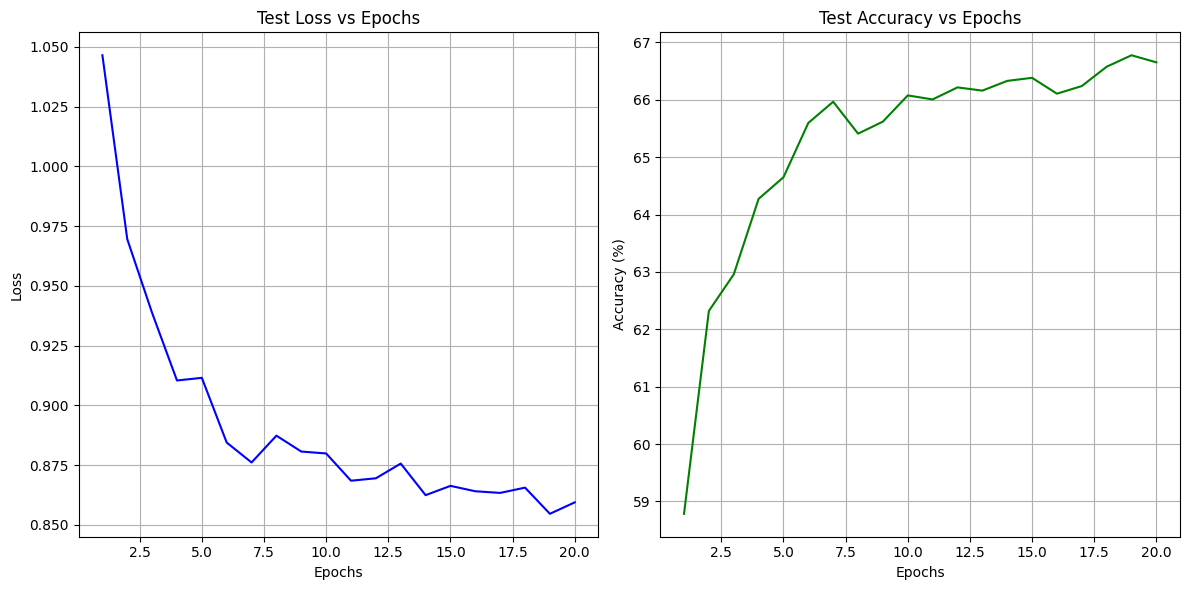

In [51]:

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, test_losses, label='Test Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Test Loss vs Epochs')
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs Epochs')
plt.grid(True)

plt.tight_layout()
plt.show()

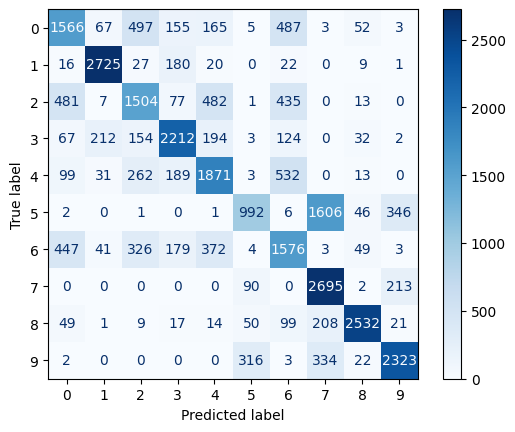

In [52]:
# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
cmd = ConfusionMatrixDisplay(cm, display_labels=[str(i) for i in range(10)])
cmd.plot(cmap='Blues')